In [16]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#list_of_tickers = ["MJ", 'SPY']
#end_date= datetime.now()
#start_date= end_date + timedelta(-365)
#tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close')
#tickers_df.head()

In [18]:
#read aggregate data csv
aggregate_df= pd.read_csv("aggregate_data.csv")
aggregate_df.set_index(pd.to_datetime(aggregate_df['date'], infer_datetime_format=True), inplace=True)
aggregate_df.drop(columns=['date'], inplace=True)
aggregate_df.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2019-09-21 16:00:00,102.44,59.58,24.59,82.79,37.30,300.16
2019-09-16 00:00:00,102.44,59.58,24.59,83.86,37.64,300.16
2019-09-13 00:00:00,103.16,60.09,25.22,82.42,37.31,301.09
2019-09-12 00:00:00,103.86,62.18,25.08,82.63,37.37,301.29
2019-09-11 00:00:00,102.83,62.38,25.71,83.38,37.60,300.25


In [19]:
#tickers_df.to_csv("MJ_index_data")

In [20]:
#tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
#tickers_df.head()

In [21]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = aggregate_df.pct_change().dropna()
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2019-09-16,0.000000,0.000000,0.000000,0.012924,0.009115,0.000000
2019-09-13,0.007029,0.008560,0.025620,-0.017171,-0.008767,0.003098
2019-09-12,0.006786,0.034781,-0.005551,0.002548,0.001608,0.000664
2019-09-11,-0.009917,0.003216,0.025120,0.009077,0.006155,-0.003452
2019-09-10,-0.001750,-0.008496,-0.008557,-0.019789,-0.017287,-0.007061


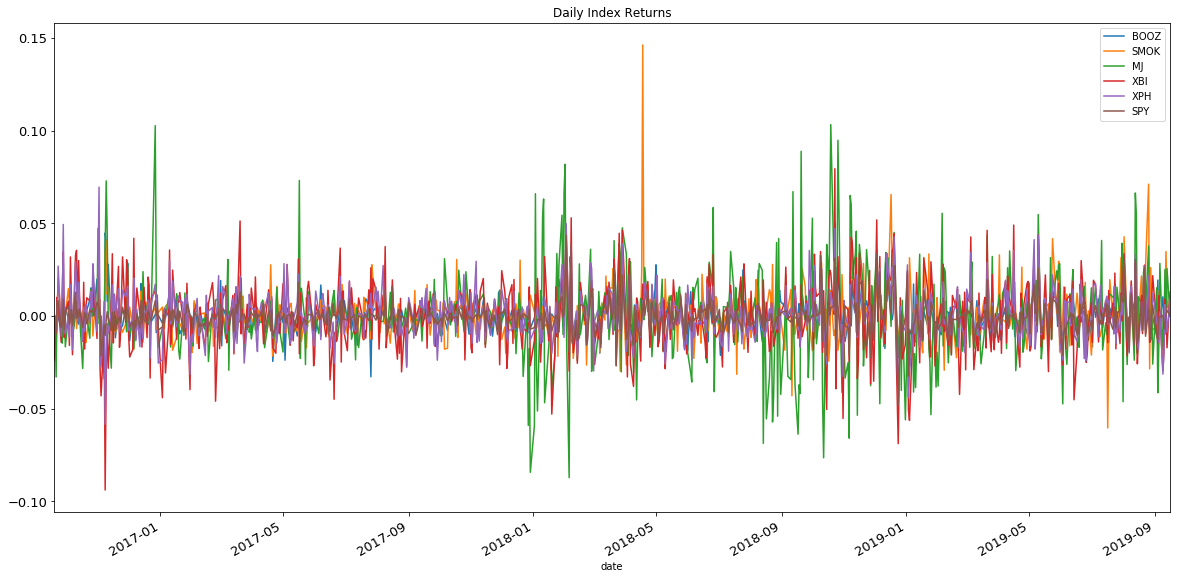

In [22]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(20,10), title= "Daily Index Returns", fontsize=13);

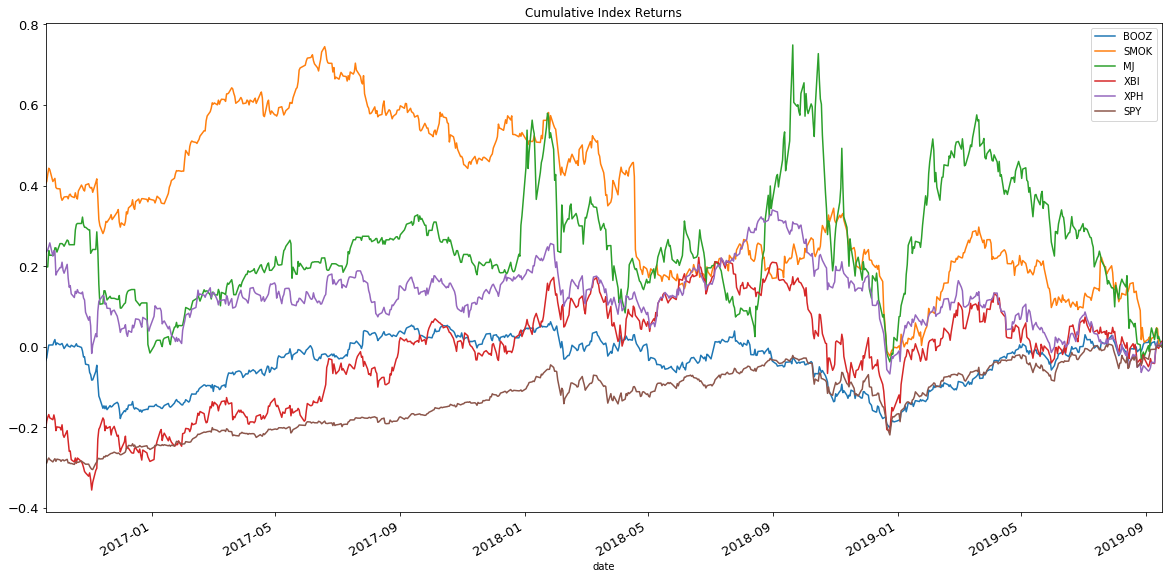

In [23]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);


In [24]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

SMOK    0.192993
MJ      0.139916
XBI     0.130027
SPY     0.079362
XPH     0.076618
BOOZ    0.061470
dtype: float64

In [25]:
annualized_std_indexes = indexes_daily_std * np.sqrt(252)
annualized_std_indexes

BOOZ    0.975811
SMOK    3.063666
MJ      2.221094
XBI     2.064110
XPH     1.216272
SPY     1.259834
dtype: float64

In [26]:
correlation= aggregate_df.corr()
correlation

,BOOZ,SMOK,MJ,XBI,XPH,SPY
BOOZ,1.000000,0.305083,0.218449,0.453539,0.275505,0.318264
SMOK,0.305083,1.000000,-0.041690,-0.334894,0.279037,-0.562516
MJ,0.218449,-0.041690,1.000000,0.451009,0.414439,0.393592
XBI,0.453539,-0.334894,0.451009,1.000000,0.423882,0.831621
XPH,0.275505,0.279037,0.414439,0.423882,1.000000,0.073947
SPY,0.318264,-0.562516,0.393592,0.831621,0.073947,1.000000


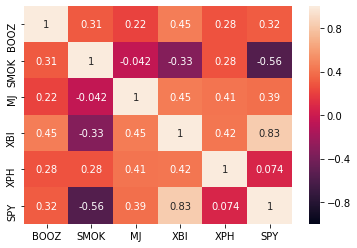

In [64]:
#Correlation heat map
import seaborn as sns
corr_all = aggregate_df.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns.values, vmin=-1, vmax=1,
            yticklabels=corr_all.columns.values, annot= True)

In [28]:
#daily returns pct change
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2019-09-16,0.000000,0.000000,0.000000,0.012924,0.009115,0.000000
2019-09-13,0.007029,0.008560,0.025620,-0.017171,-0.008767,0.003098
2019-09-12,0.006786,0.034781,-0.005551,0.002548,0.001608,0.000664
2019-09-11,-0.009917,0.003216,0.025120,0.009077,0.006155,-0.003452
2019-09-10,-0.001750,-0.008496,-0.008557,-0.019789,-0.017287,-0.007061


# Calculate Volatility

In [67]:
volatility = df_daily_returns.std() * np.sqrt(252)
volatility

BOOZ    0.141926
SMOK    0.212611
MJ      0.352232
XBI     0.282658
XPH     0.205717
SPY     0.129308
dtype: float64

In [29]:
#calculate average daily returns of each index
avg_daily_return_booz = df_daily_returns.mean()['BOOZ']
avg_daily_return_smok = df_daily_returns.mean()['SMOK']
avg_daily_return_mj = df_daily_returns.mean()['MJ']
avg_daily_return_xbi = df_daily_returns.mean()['XBI']
avg_daily_return_xph = df_daily_returns.mean()['XPH']
avg_daily_return_spy = df_daily_returns.mean()['SPY']
print("BOOZ average daily return is", avg_daily_return_booz)
print("SMOK average daily return is", avg_daily_return_smok)
print("MJ average daily return is", avg_daily_return_mj)
print("XBI average daily return is", avg_daily_return_xbi)
print("XPI average daily return is", avg_daily_return_xph)
print("SPY average daily return is", avg_daily_return_spy)

BOOZ average daily return is -7.308434562164279e-06
SMOK average daily return is 0.0005393045878939412
MJ average daily return is 0.0004843718668027893
XBI average daily return is -0.00014462284116596936
XPI average daily return is 0.00036193342635836294
SPY average daily return is -0.0004198624440560158


In [30]:
#calculate daily std dev of indexes
std_dev_daily_return_booz = df_daily_returns.std()['BOOZ']
std_dev_daily_return_smok = df_daily_returns.std()['SMOK']
std_dev_daily_return_mj = df_daily_returns.std()['MJ']
std_dev_daily_return_xbi = df_daily_returns.std()['XBI']
std_dev_daily_return_xph = df_daily_returns.std()['XPH']
std_dev_daily_return_spy = df_daily_returns.std()['SPY']
print("BOOZ volatility is", std_dev_daily_return_booz)
print("SMOK volatility is", std_dev_daily_return_smok)
print("MJ volatility is", std_dev_daily_return_mj)
print("XBI volatility is", std_dev_daily_return_xbi)
print("XPH volatility is", std_dev_daily_return_xph)
print("SPY volatility is", std_dev_daily_return_spy)


BOOZ volatility is 0.008940512330015464
SMOK volatility is 0.013393263709435912
MJ volatility is 0.0221885516416437
XBI volatility is 0.017805790484252817
XPH volatility is 0.012958934387003922
SPY volatility is 0.008145624768022474


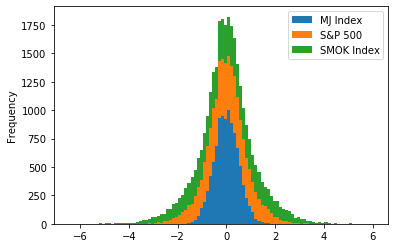

In [58]:
std_dev_daily_return_mj = np.random.normal(scale=0.5, size=10000)
std_dev_daily_return_spy = np.random.normal(scale=1.0, size=10000)
std_dev_daily_return_smok = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "MJ Index": std_dev_daily_return_mj,
    "S&P 500": std_dev_daily_return_spy,
    "SMOK Index": std_dev_daily_return_smok
})

portfolio_std.plot.hist(stacked=True, bins=100)

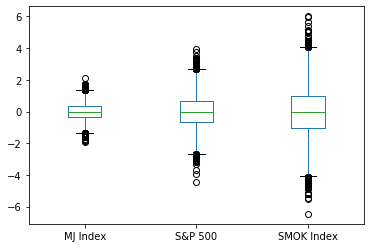

In [59]:
portfolio_std.plot.box()

In [31]:
#show the final closigprices
booz_last_price = aggregate_df['BOOZ'][0]
smok_last_price = aggregate_df['SMOK'][0]
mj_last_price = aggregate_df['MJ'][0]
xbi_last_price = aggregate_df['XBI'][0]
xph_last_price = aggregate_df['XPH'][0]
spy_last_price = aggregate_df['SPY'][0]
print(booz_last_price)
print(smok_last_price)
print(mj_last_price)
print(xbi_last_price)
print(xph_last_price)
print(spy_last_price)

102.44
59.58
24.59
82.79
37.3
300.16


In [32]:
# Setup the Monte Carlo Parameters 500msimulations over 10 years
number_simulations = 500
number_records = 252 * 10
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [49]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]
    simulated_booz_prices = [booz_last_price]
    #simulated_smok_prices = [smok_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        simulated_booz_price = simulated_booz_prices[-1] * (1 + np.random.normal(avg_daily_return_booz, std_dev_daily_return_booz))
        #simulated_smok_price = simulated_smok_prices[-1] * (1 + np.random.normal(avg_daily_return_smok, std_dev_daily_return_smok))
       
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
        simulated_booz_prices.append(simulated_booz_price)
        #simulated_smok_prices.append(simulated_smok_price)
    
        
    monte_carlo["MJ prices"] = pd.Series(simulated_mj_prices)
    monte_carlo["BOOZ prices"] = pd.Series(simulated_booz_prices)
    #monte_carlo["SMOK prices"] = pd.Series(simulated_smok_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights50/50
    weight = [.5, .5]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985820,1.009410,1.006246,1.015208,1.000796,0.984627,1.024994,1.005509,0.997648,0.987387,...,0.994294,1.008967,0.988631,1.008379,1.007421,0.989087,1.008342,0.985392,1.009355,1.003469
2,0.970085,0.996606,1.012387,1.001682,0.987156,0.987122,1.017641,1.032911,0.984818,0.982624,...,1.010630,0.989123,0.970434,0.998682,1.000107,0.985620,1.031629,0.982422,1.031695,0.980313
3,0.950755,1.007302,1.026684,1.016405,0.984099,0.995199,1.015872,1.027562,0.995268,0.984943,...,1.014746,0.981626,0.971505,0.994128,1.000822,0.961710,1.018639,0.977266,1.034462,0.979858
4,0.947620,1.015792,1.014850,1.007208,0.985406,0.995540,1.000820,1.028785,1.002360,0.990815,...,1.026981,0.991352,0.967867,0.996748,1.013097,0.963848,1.014722,0.973659,1.033325,0.960892


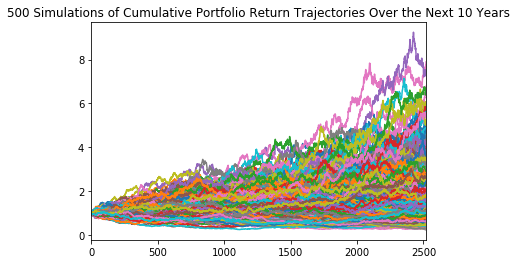

In [50]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 10 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

### MJ INDEX Monte Carlo simulation

In [37]:
# Monte carlo for MJ index 500 simulations in 10 years
for s in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]

    for z in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
    
    # Create a DataFrame of the simulated prices
    simulated_price_df = pd.DataFrame({
        "Simulated MJ Prices": simulated_mj_prices
        })

# Print head of DataFrame
simulated_price_df.tail()

,Simulated MJ Prices
2516,103.852225
2517,104.886747
2518,103.579706
2519,102.763725
2520,102.601811


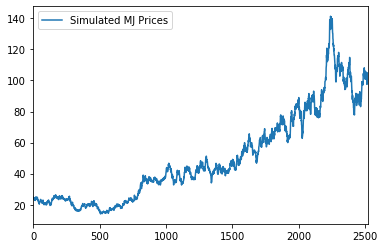

In [42]:
#Simulated stock price trajectory for MJ
simulated_price_df.plot()

In [43]:
#Daily returs if simulated stock price
simulated_mj_daily_returns = simulated_price_df.pct_change()
simulated_mj_daily_returns.head()

,Simulated MJ Prices
0,NaN
1,-0.018962
2,0.026420
3,-0.021801
4,0.004978


In [44]:
#cumulative returns of simulated MJ stock prices
simulated_mj_cumulative_returns = (1 + simulated_mj_daily_returns).cumprod()
simulated_mj_cumulative_returns.head()

,Simulated MJ Prices
0,NaN
1,0.981038
2,1.006956
3,0.985004
4,0.989907



### Calculate the Cumulative Profits/Losses of Simulated Stock Prices for MJ Index

In [47]:
# Multiply an initial investment of 10,000 by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
initial_investment = 10000
cumulative_pnl = initial_investment * simulated_mj_cumulative_returns
cumulative_pnl.head()

,Simulated MJ Prices
0,NaN
1,9810.377131
2,10069.562999
3,9850.039192
4,9899.068623


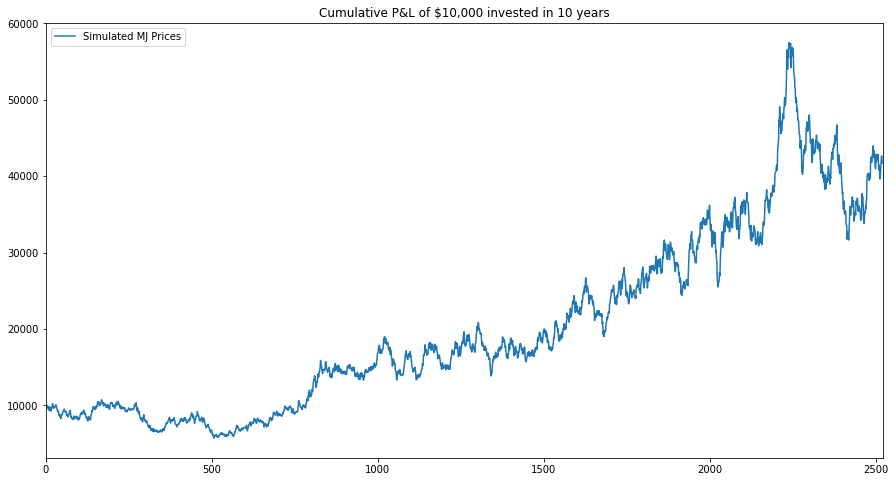

In [55]:
cumulative_pnl.plot(figsize= (15,8), title= "Cumulative P&L of $10,000 invested in 10 years")